In [1]:
from pathlib import Path
from freeqdsk import geqdsk
from fusiondls import read_geqdsk
import matplotlib.pyplot as plt

In [ ]:
equilibria = dict(
    compass = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\COMPASS\compass.geqdsk",
    mastu = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\MAST-U\D moulton super X\qian_exp45460_new.eqdsk",
    mastu2 = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\MAST-U\46860\sxd_46860_equ_450ms.symm.x4.crop.equ",
    st40 = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\ST40_P3_eq_0015_modgeom.geqdsk",
    step = r"C:\Users\Mike\OneDrive\Project\DLS\SPR45details\AH_PI4_P5-LATEST.geqdsk",
)

def plot_field(path: Path):
    with path.open() as fh:
        data = geqdsk.read(fh)

    psi_n = (data.psi - data.simagx) / (data.sibdry - data.simagx)

    plt.pcolormesh(data.r_grid, data.z_grid, psi_n, cmap = "Spectral_r")
    plt.colorbar(label=r"$\psi_N$")
    plt.contour(data.r_grid, data.z_grid, psi_n, levels=[1.0])
    plt.xlabel("R [m]")
    plt.ylabel("Z [m]")

    # Plot walls
    # For some G-EQDSK files, the variables rlim and zlim are not present.
    # In these cases, a wall will need to be supplied by the user.
    # This is done by supplying a tuple of the R and Z coordinates along
    # the wall, where R and Z are 1D arrays:
    # >>> geometries = read_geqdsk(single_null, wall=(R, Z))
    assert data.rlim is not None
    assert data.zlim is not None
    plt.plot(data.rlim, data.zlim, label="wall")

c:\pyenvs\fusion312\Lib\site-packages\freeqdsk\_fileutils.py:316: UserWarning: Additional elements were detected beyond the end of the requested array. These have been discarded.
  warnings.warn(


FAILED TO READ compass!
FAILED TO READ mastu!


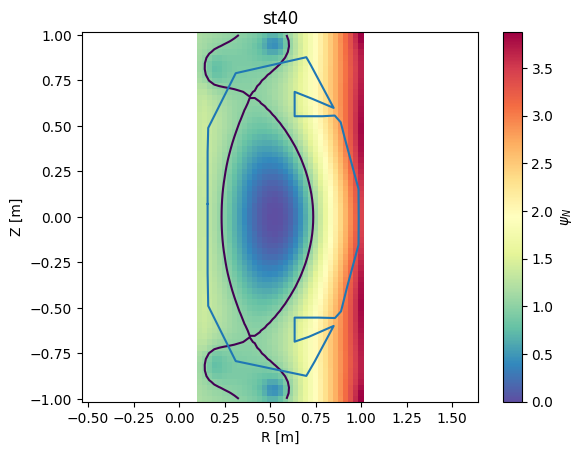

c:\pyenvs\fusion312\Lib\site-packages\freeqdsk\geqdsk.py:592: UserWarning: The value of 'simagx' should be duplicated. Found values 6.27547229 and 1.509819835
  warnings.warn(
c:\pyenvs\fusion312\Lib\site-packages\freeqdsk\geqdsk.py:592: UserWarning: The value of 'sibdry' should be duplicated. Found values 1.509819835 and 6.27547229
  warnings.warn(


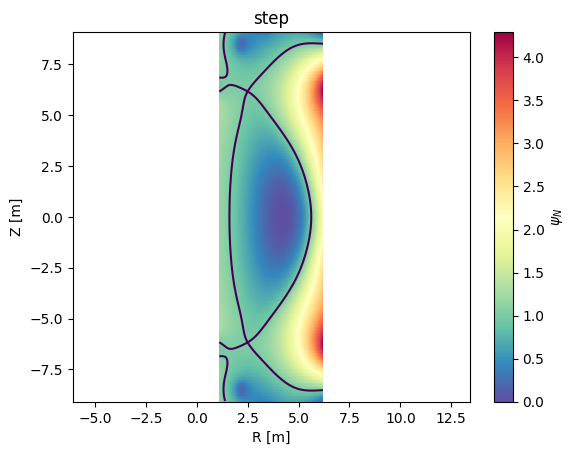

In [21]:
for name, path in equilibria.items():
    try:
        plot_field(Path(path))
        plt.axis("equal")
        plt.title(name)
        plt.show()
    except:
        print(f"FAILED TO READ {name}!")

In [26]:
def plot_field_lines(path: Path):
    # Get field lines
    # Automatic COCOS identification is not always reliable.
    # In the single-null case, we have to assert the COCOS manually.
    cocos = 11 if "single" in path.name else None
    geometries = read_geqdsk(path, cocos=cocos)
    # Geometries is a dictionary with the following keys:
    # - "ou" : outboard upper
    # - "ol" : outboard lower
    # - "iu" : inboard upper
    # - "il" : inboard lower
    # For the single null, only "ol" and "il" are present
    for leg in ("ol", "il", "ou", "iu"):
        if geometries[leg] is None:
            continue
        plt.plot(geometries[leg].R, geometries[leg].Z, label=leg)
    plt.legend()
    
plot_field_lines(Path(equilibria["mastu"]))

ValueError: 0-6.556019783E-0 is not a valid input as for an E, ES, EN or D edit descriptor